In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

### 1.19 and 1.23

In [2]:
gpa_act_data = pd.read_csv('./CH01PR19.txt', delim_whitespace=True, header=None)
gpa_act_data.columns = ['gpa','act']

In [3]:
# Obtain the least squares estimates of B_0 and B_1
# and state the estimated regression function.

x_act_score = gpa_act_data['act'].as_matrix()
x_act_score = x_act_score.reshape(len(x_act_score),1)
y_gpa_score = gpa_act_data['gpa'].as_matrix()

regr = linear_model.LinearRegression()

In [4]:
regr.fit(X=x_act_score, y=y_gpa_score)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
print('Intercept: {i}\nSlope: {s}'.format(i=regr.intercept_, s=regr.coef_))

Intercept: 2.114049287267456
Slope: [ 0.03882713]


In [6]:
# Plot the score prediction and the data
y_gpa_score_prediction = regr.predict(x_act_score)

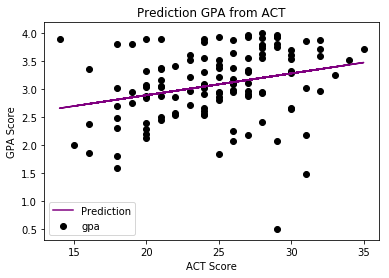

In [7]:
plt.scatter(gpa_act_data['act'], gpa_act_data['gpa'], color='black')
plt.plot(gpa_act_data['act'], y_gpa_score_prediction, color='purple', label='Prediction')
plt.ylabel('GPA Score')
plt.xlabel('ACT Score')
plt.legend()
plt.title('Prediction GPA from ACT')
plt.show()

In [8]:
# Point estimate of the mean freshman GPA for students
# with ACT test score X = 30

score = regr.intercept_ + regr.coef_[0]*30
print(score)

3.27886309443


In [9]:
score_plus_one = regr.intercept_ + regr.coef_[0]*31
print(score_plus_one)

3.31769022133


In [10]:
# The difference between the predictor and the predictor plus 1 unit
# is equal to the coefficient of the regression
print(score_plus_one-score)
print(regr.coef_[0])

0.0388271269053
0.0388271269053


### 1.23

In [19]:
residuals = y_gpa_score - np.mean(y_gpa_score)
sum_of_residuals = np.sum(residuals)
print(np.round(sum_of_residuals,2))

-0.0


In [29]:
sum_of_squares = np.sum(np.power(residuals,2))
mean_squared_error = sum_of_squares/(len(y_gpa_score)-2)
print(mean_squared_error)
std = np.sqrt(mean_squared_error)
print(std)

0.418690285593
0.647062814256


In [30]:
print("The standard deviation is in the same units as the original dependent variable, in this case, GPA")

The standard deviation is in the same units as the original dependent variable, in this case, GPA
